In [1]:
import sys
sys.path.append('../')

import numpy as np
import tempfile
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import logging
logging.getLogger().setLevel(logging.INFO)

from banditpylib import trials_to_dataframe
from banditpylib.arms import BernoulliArm
from banditpylib.bandits import MultiArmedBandit
from banditpylib.protocols import SinglePlayerProtocol
from banditpylib.learners.mab_fbbai_learner import Uniform, SR, SH

In [2]:
budget = 1000
means = np.random.uniform(0, 1, 50)
arms = [BernoulliArm(mean) for mean in means]
bandit = MultiArmedBandit(arms=arms)
learners = [Uniform(arm_num=len(arms), budget=budget, name='Uniform Sampling'), 
            SR(arm_num=len(arms), budget=budget, name='Successive Rejects'),
            SH(arm_num=len(arms), budget=budget, name='Sequential Halving')]
# For each setup, we run 500 trials
trials = 500
temp_file = tempfile.NamedTemporaryFile()

In [3]:
game = SinglePlayerProtocol(bandit=bandit, learners=learners)
# Start playing the game
# Add `debug=True` for debugging purpose
game.play(trials=trials, output_filename=temp_file.name)

INFO:absl:start Uniform Sampling's play with multi_armed_bandit
INFO:absl:Uniform Sampling's play with multi_armed_bandit runs 2.81 seconds.
INFO:absl:start Successive Rejects's play with multi_armed_bandit
INFO:absl:Successive Rejects's play with multi_armed_bandit runs 5.61 seconds.
INFO:absl:start Sequential Halving's play with multi_armed_bandit
INFO:absl:Sequential Halving's play with multi_armed_bandit runs 3.22 seconds.


In [4]:
trials_df = trials_to_dataframe(temp_file.name)

In [5]:
trials_df.head()

,rounds,total_actions,regret,other,bandit,learner
0,1,1000,0.0,0.0,multi_armed_bandit,Uniform Sampling
1,1,1000,1.0,0.0,multi_armed_bandit,Uniform Sampling
2,1,1000,1.0,0.0,multi_armed_bandit,Uniform Sampling
3,1,1000,0.0,0.0,multi_armed_bandit,Uniform Sampling
4,1,1000,1.0,0.0,multi_armed_bandit,Uniform Sampling


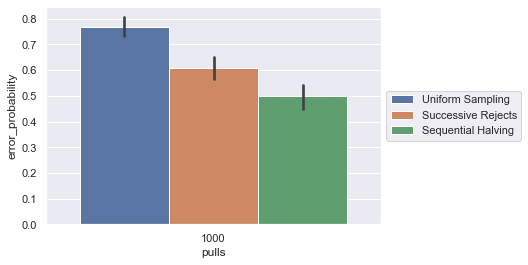

In [6]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='total_actions', y='regret', hue='learner', data=trials_df)
plt.xlabel('pulls')
plt.ylabel('error_probability')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

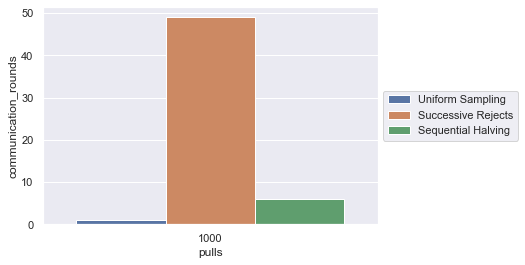

In [7]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='total_actions', y='rounds', hue='learner', data=trials_df)
plt.xlabel('pulls')
plt.ylabel('communication_rounds')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))